# Plastic waste recycling in Japan

Japan love story with plastic is well-known. This viz started with me being surprised by the official recycling rate for plastic: 80%. which didn't match what I was seeing on the ground and the huge deal it was when China suddenly decided to simply refuse plastic waste from any other countries. So I decided to check.

For more info, you can check the [companion blog post (EN)](https://achikochi.tokyo/en/blog/viz-en/plastic-in-japan-collected-not-recycled/) for this viz.

As usual, main labels are in French as it was the main target audience for this viz

Source of data: https://forbesjapan.com/articles/detail/27563?n=3&e=24796

## Loading and preping data

3 of the labels where manual edited to avoid ggplot warnings when dealing with some UTF-8 strings

In [2]:
library(tidyverse)
library(ggthemes)
library(viridis)

Sys.setlocale('LC_ALL', "fr_FR.UTF-8")

plastique <- read_csv('forbes.csv')%>%
    mutate(
        Percentage = as.numeric(str_replace(Percentage, '%', ''))
    ) %>%
    arrange(-Percentage) %>%
    mutate(
        sort = seq(1, 5)
    )

plastique$sort[plastique$Detail == 'Décharge'] <- 0
# Sinon ggplot HURLE des messages d'alerte impossibles a masquer :
plastique$Detail[plastique$Percentage == 15.2] <- "Envoyé à\nl'étranger"
plastique$Detail[plastique$Percentage == 4.2] <- "Chemical\nRecycling"
plastique$Detail[plastique$Percentage == 8.2] <- "Recyclé\nau Japon"
plastique

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: viridisLite


[1] "fr_FR.UTF-8/fr_FR.UTF-8/fr_FR.UTF-8/C/fr_FR.UTF-8/C"

Parsed with column specification:
cols(
  Categorie = col_character(),
  Detail = col_character(),
  Percentage = col_character()
)
Warning message:
“The `printer` argument is deprecated as of rlang 0.3.0.
This warning is displayed once per session.”

Categorie,Detail,Percentage,sort
Thermal Recycling,Incinéré,56.2,1
Décharge,Décharge,16.2,0
Material Recycling,Envoyé à l'étranger,15.2,3
Material Recycling,Recyclé au Japon,8.2,4
Chemical Recycling,Chemical Recycling,4.2,5


## Main viz

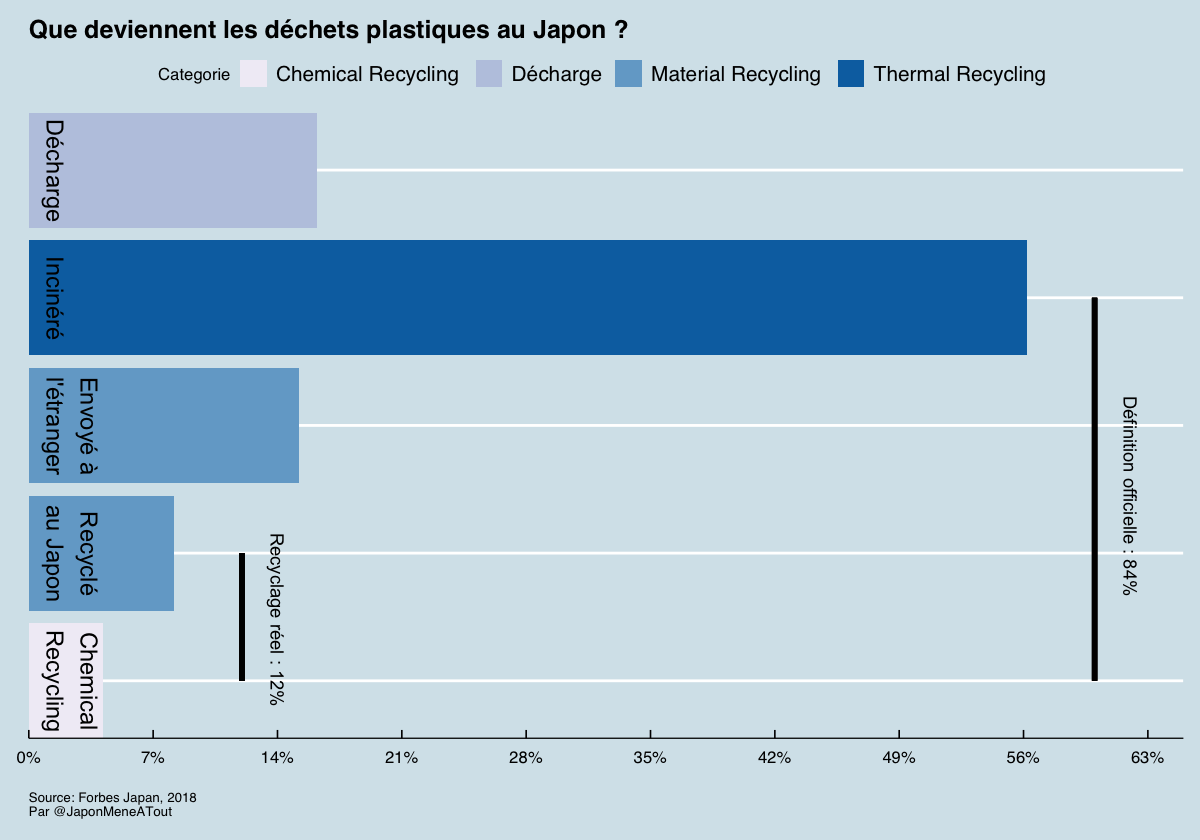

In [3]:
options(repr.plot.width=10, repr.plot.height=7)

plastique %>%
    ggplot(aes(reorder(Detail, -sort), Percentage/100, fill=Categorie)) +
    geom_bar(stat = 'identity') +
    geom_text(aes(x= Detail, y= 0.01, label=Detail, angle = -90), vjust=0, size = 5) +
    coord_flip(expand = F) +
    theme_economist() +
    labs(
        x = '',
        y = '',
        title = 'Que deviennent les déchets plastiques au Japon ?',
        caption = 'Source: Forbes Japan, 2018\nPar @JaponMeneATout'
    ) +
    theme(
        plot.caption = element_text(hjust = 0),
        axis.text.y = element_blank()
    ) +
    scale_y_continuous(limits = c(0, 0.65), breaks = seq(0, 0.65, 0.07), labels=scales::percent(seq(0, 0.65, 0.07), accuracy=1)) +
    geom_segment(aes(y = 0.60, yend = 0.60, x = 'Incinéré', xend = 'Chemical\nRecycling'), size = 1.5) +
    annotate('text', y = 0.62, x = "Envoyé à\nl'étranger", label="Définition officielle : 84%", angle = -90, hjust = 0.15) +
    geom_segment(aes(y = 0.12, yend = 0.12, x = 'Recyclé\nau Japon', xend = 'Chemical\nRecycling'), size = 1.5) +
    annotate('text', y = 0.14, x = "Recyclé\nau Japon", label="Recyclage réel : 12%", angle = -90, hjust = 0.12) +
    scale_fill_brewer(palette = "PuBu")

ggsave("plastic_waste.png", height=7, width=10)